# SCRIPT OUTLINE

### IMPORTING LIBRARIES
### DEFINING A SHORT PROJECT FOLDER
### IMPORTING DATASET
### EXERCISES
    ### IF-STATEMENTS WITH USER-DEFINED FUNCTIONS
    ### IF-STATEMENTS WITH THE LOC() FUNCTION
    ### IF-STATEMENTS WITH FOR-LOOPS
### THE TASK

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import os

In [3]:
# Project folder path definition

path = r'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.6/2021-08 - 4.6 Instacart Grocery Basket'

In [4]:
path

'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.6/2021-08 - 4.6 Instacart Grocery Basket'

In [5]:
# Importing "orders_products_merged" from pickle file

df_orders_products_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [6]:
df_orders_products_merged.shape

(30356128, 15)

In [7]:
df_orders_products_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,both


# EXERCISE

## IF-STATEMENTS WITH USER-DEFINED FUNCTIONS

In [8]:
# Defining a subset of data - 1000000 records

df_ords_prods_merge = df_orders_products_merged[:1000000]

In [9]:
df_ords_prods_merge.shape

(1000000, 15)

In [10]:
# Labeling the column "Prices"

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [11]:
df_ords_prods_merge['price_range'] = df_ords_prods_merge.apply(price_label, axis=1)

<ipython-input-11-ebe1bc98f65d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_merge['price_range'] = df_ords_prods_merge.apply(price_label, axis=1)


In [12]:
df_ords_prods_merge['price_range'].value_counts(dropna = False)

Mid-range product    656952
Low-range product    334498
High range             8550
Name: price_range, dtype: int64

In [13]:
df_ords_prods_merge['prices'].min()

1.0

In [14]:
df_ords_prods_merge['prices'].mean()

7.810190999989335

In [15]:
df_ords_prods_merge['prices'].max()

24.5

<AxesSubplot:ylabel='price_range'>

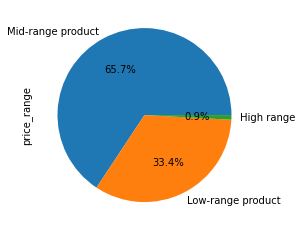

In [22]:
# Creating a chart from the “price_range” column.

df_ords_prods_merge['price_range'].value_counts().plot.pie(autopct='%1.1f%%')


## IF-STATEMENTS WITH THE LOC() FUNCTION

In [15]:
# # Labeling the column "Prices" using LOC - subset of dataset

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df_ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'



/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [16]:
df_ords_prods_merge['price_range_loc'].value_counts(dropna = False)

Mid-range product     656952
Low-range product     334498
High-range product      8550
Name: price_range_loc, dtype: int64

In [17]:
df_ords_prods_merge.shape

(1000000, 17)

In [18]:
# Labeling the column "Prices" using LOC - entire dataset

df_orders_products_merged.loc[df_orders_products_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_orders_products_merged.loc[(df_orders_products_merged['prices'] <= 15) & (df_orders_products_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
df_orders_products_merged.loc[df_orders_products_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'



In [19]:
df_orders_products_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product     20489445
Low-range product      9476834
High-range product      389849
Name: price_range_loc, dtype: int64

In [20]:
df_orders_products_merged.shape

(30356128, 16)

In [21]:
df_orders_products_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range product
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both,Mid-range product
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both,Mid-range product
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,both,Mid-range product


## IF-STATEMENTS WITH FOR-LOOPS

In [22]:
# printing ages from 35 to 45

for x in range(30,45):
        print('My age is %d'% (x))

My age is 30
My age is 31
My age is 32
My age is 33
My age is 34
My age is 35
My age is 36
My age is 37
My age is 38
My age is 39
My age is 40
My age is 41
My age is 42
My age is 43
My age is 44


In [23]:
# Fiding the busiest day of the week
# Saturday (value = 0) is the busiest day of the week, following by Sunday as the second busiest dow. 
# The lowest busy day of the week is Wednesday (value 4).

df_orders_products_merged['order_dow'].value_counts(dropna = False)


0    5784140
1    5308970
6    4194427
5    3955747
2    3951243
3    3603892
4    3557709
Name: order_dow, dtype: int64

In [24]:
# Counting the busiest, least busy and regular busy day of the week

result = []

for value in df_orders_products_merged["order_dow"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")


In [25]:
result

['Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regula

In [26]:
df_orders_products_merged['busiest day'] = result

In [27]:
df_orders_products_merged['busiest day'].value_counts(dropna = False)

Regularly busy    21014279
Busiest day        5784140
Least busy         3557709
Name: busiest day, dtype: int64

# TASK

## 1

In [ ]:
# Already completed previously.

# 2

In [32]:
# Counting the two busiest and the two slowest busy days of the week

result2 = []

for value in df_orders_products_merged["order_dow"]:
  if value <= 1: #hrs 0, 1 Saturday and Sunday 
    result2.append("Busiest days")
  elif value >= 3 and value <=4: #hrs 3, 4 Tuesday and Wednesday 
    result2.append("Slowest busy days")  
  else: #hrs 2, 5, 6, Monday, Thursday, Friday
    result2.append("Regularly busy")

In [33]:
result2

['Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Slowest busy days',
 'Busiest days',
 'Regularly busy',
 'Slowest busy days',
 'Busiest days',
 'Busiest days',
 'Slowest busy days',
 'Slowest busy days',
 'Regularly busy',
 'Slowest busy days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest busy days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Slowest busy days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest busy days',
 'Busiest days',
 'Busiest days',
 'Slowest busy days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Slowest busy days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Slowest busy days',
 'Busiest days

## 3

In [30]:
df_orders_products_merged['busiest days'] = result2

In [31]:
df_orders_products_merged['busiest days'].value_counts(dropna = False)

Regularly busy       12101417
Busiest days         11093110
Slowest busy days     7161601
Name: busiest days, dtype: int64

In [ ]:
# Saturday (0) and Sunday (1), the busiest days, represent 36,5% of the total orders. 
# Tuesday (3) and Wednesday (4) are the lowest busy days which represent 23,5% of the total orders.
# Monday (2), Thursday (5) and Friday (6), the regular busy days represent almost 40% of the total orders.


## 4

In [34]:
# Fiding and counting the busiest hour of the day

df_orders_products_merged['order_hour_of_day'].value_counts(dropna = False)

10    2596188
11    2566881
14    2519500
15    2489783
13    2489653
12    2447958
16    2367083
9     2313649
17    1945532
8     1624128
18    1522270
19    1170190
20     910814
7      845477
21     746935
22     592910
23     376165
6      275062
0      203616
1      108191
5       82799
2       64013
4       49441
3       47890
Name: order_hour_of_day, dtype: int64

In [47]:
# Fiding, counting and grouping the busiest hour of the day

# Counts in millions: hours 10, 11, 14, 15, 13, 12, 16, 9, 17, 8, 18, 19 as Most Orders
# Counts in hundreds of thousands: hours 20, 7, 21, 22, 23, 6, 0, 1 as Average Orders
# Counts in tens of thousands: hours 5, 2, 4, 3 as Fewest Orders


df_orders_products_merged.loc[(df_orders_products_merged['order_hour_of_day'].isin([10, 11, 14, 15, 13, 12, 16, 9, 17, 8, 18, 19]),'busiest_period_of_day')] = 'Most Orders'
df_orders_products_merged.loc[(df_orders_products_merged['order_hour_of_day'].isin([20, 7, 21, 22, 23, 6, 0, 1]),'busiest_period_of_day')] = 'Average Orders'
df_orders_products_merged.loc[(df_orders_products_merged['order_hour_of_day'].isin([5, 2, 4, 3]),'busiest_period_of_day')] = 'Fewest Orders'




# 5

In [48]:
df_orders_products_merged['busiest_period_of_day'].value_counts(dropna = False)

Most Orders       26052815
Average Orders     4059170
Fewest Orders       244143
Name: busiest_period_of_day, dtype: int64

## 6,7,8

In [44]:
# Project folder changed for export

path = r'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.7/2021-10 - 4.7 Instacart Grocery Basket'

In [45]:
path

'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.7/2021-10 - 4.7 Instacart Grocery Basket'

In [46]:
# My notebook is cleaned and structured and the code is well commented. 
# The dataframe has been exported as a pickle file with the new columns added.
# Exported the file "orders_products_DNV.pkl" to the current folder.

df_orders_products_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_DNV.pkl'))